<font size ="8"> <div align="center">**Understanding Face Identification using Unsupervised Learning**</div></font>
<font size ="5"> <div align="center">By **Jon Nyner Gavan**</div></font>

-----------------------------
# **Context of the Exercise (Face ID)**
-----------------------------
In this exercise, a repository of images will be passed through a dimensionality reduction algorithm, to illustrate the application of Unsupervised Learning for Facial Identification/Recognition.

-----------------------------
## **Data Description**
-----------------------------

TThe given dataset is a folder/repository of MIT Professors and Instructors for the Data Science and Machine Learning Certification Course. The images are in .jpg format and titled "A.jpg", "B.jpg", ..."N.jpg".


-----------------------------
## **Objectives of the Study**
-----------------------------
The objective of this problem is to reduce the number of features by using dimensionality reduction techniques like PCA and extract insights.

### **Importing libraries**

In [ ]:
# Importing the pertinent libraries
import numpy as np
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import copy

# utils library is a user defined library composed of several function
# used in image processing
import utils

### **Loading the Image Dataset**

**Pre-processing the Image Dataset**

Given that the raw images are not all the same dimensions and in RGB format, we will need to pre-process them to all be of the same dimensions and in Grayscale color.

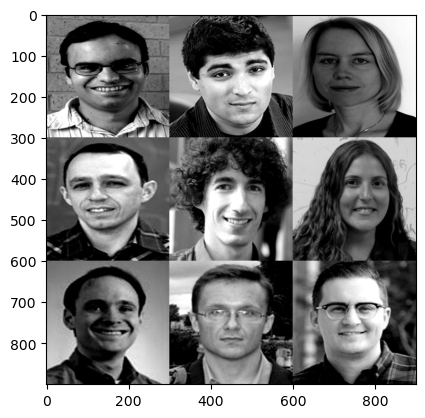

In [ ]:
# number of images on the training set.
M = 14;
# read and show images(jpg);

# S will store all the images
S=[];

#Ensure the instructors folder is in the same directory and has not been moved.
S, all_faces = utils.loadFaces('instructors/')
grid_im = utils.gray_images_square_grid(np.array(all_faces))
plt.imshow(grid_im, cmap='gray')

Images of the instructors are loads in grayscale.

### **Computing	Eigenfaces**

**The computation of Eigenfaces will follow the steps:**

1. We first need to normalize the each image. Note that the normalized, square, gray images are saved in the same location as the script and will be reused several times.

2. Compute a Mean (Average) face from all the normalized faces.

3. Now, we can compute the Eigenfaces (Eigenvectors).

**Defining a Function for Computing Eigenfaces**

In [ ]:
'''The following code computes all the necessary components needed to compute the Eigenfaces and
then finally saves (under the directory: “eigenfaces”) and shows the Eigenfaces:'''

def computeEigenFaces(S):
    dbx = np.array(S) #Converting into numpy array
    A = dbx # Note that the dbx here is transposed as compared to the original M script

    # Covariance matrix C=A'A, L=AA'
    covariance_matrix = np.matmul(A, A.T)

    A=None

    #Compute the eigenvalues and eigenvectors from the covariance matrix
    eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)


    # Sort and eliminate those whose eigenvalue is small based on the threshold.
    nonzero_eigenvals = eigen_values > 1e-4
    v = eigen_vectors[:,nonzero_eigenvals]
    d = eigen_values[nonzero_eigenvals]

    # Sort eigenvalues already sorted, but in descending order, so let's change this into ascending
    d = d[::-1]
    v = v[:,::-1]


    # Reducing the number of dimensions by multiplying original vales and eigenvectors.
    u = []
    for i in range(len(d)):
        temp = np.sqrt(d[i])
        u.append(np.matmul(dbx.T, v[:,i])/temp)

    # Normalization of reduced dimensions.
    for i in range(len(u)):
        kk = u[i]
        temp = np.sqrt(np.sum(np.square(kk)))
        u[i] = u[i]/temp

    return u

**Processing and Visualization**

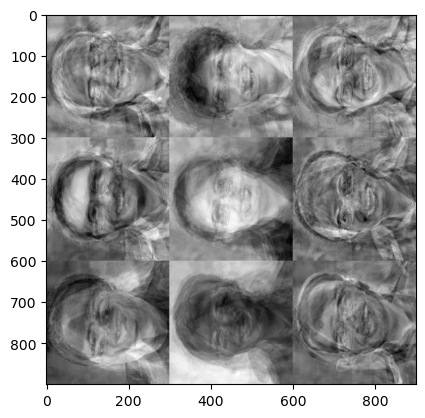

In [ ]:
# Normalize the images
S = utils.normalizeImages(S)

# Compute average face
avg_face = utils.computeAverageFace(S)

# Calling the above function which results the eigenfaces
EigenFaces = computeEigenFaces(S)

# Now render the eigenfaces
EigenFacesIm = []

#Visualizaing the eigenfaces
for i in range(len(EigenFaces)):
    img = np.reshape(EigenFaces[i], (300,300))
    img = img.T
    # Scale the image
    img = utils.convertImageToU8bit(img)
    # convert and save
    im = Image.fromarray(img)
    im.convert('RGB').save('eigenfaces/eigen_{}.jpeg'.format(i+1))

    EigenFacesIm.append(img)

_, eigen_faces = utils.loadFaces('.\\eigenfaces\\')
grid_im = utils.gray_images_square_grid(np.array(eigen_faces))
plt.imshow(grid_im, cmap='gray')

### **Reconstructing Image from EigenFaces**

Given an unknown face new_image.jpg, we need to first preprocess the face and make it normalized. We can reconstruct a face by using these eigenfaces. Each face is just a weighted combination of the eigenfaces. We obtain the weights by multiplying the normalized image with the eigenfaces.

Finally, To reconstruct a face, we multiply the weights with the eigenfaces, and add the mean face.

**Please save a new_image.jpg you want to check for.**

**Defining a function for Reconstructing Images**

In [ ]:
'''Defining a function for reconstructing faces using eigenfaces generated
from dimensionality reduction algorithm'''

def reconstructNewFaces(u, mean_face, input_image = 'new_image.jpg'):

    eigen_face = np.array(u)

    # Read the input image and convert to gray scale
    im = Image.open(input_image)
    InputImage = im.convert('L')

    # Converting to numpy array
    im_raw = np.asarray(InputImage)

    # Reshaping to vector
    InImage = np.reshape(im_raw.T,im_raw.shape[0]*im_raw.shape[1])

    # Normalization of the vector
    temp = InImage
    me=np.mean(temp)
    st=np.std(temp)
    temp=(temp-me)*st/(st+me)
    NormImage = temp

    # obtain the weights by dotting the normalized image with the eigenfaces
    weights = np.matmul(u, NormImage.T)

    # To reconstruct a face, we dot the weights with the eigenfaces, and add the mean face.
    ReshapedImage = mean_face + np.matmul(weights, u)

    # Converting back to image
    ReshapedImage = np.reshape(ReshapedImage,im_raw.shape)
    ReshapedImage = ReshapedImage.T

    return ReshapedImage

**Showing an Example of a Reconstructed Image**

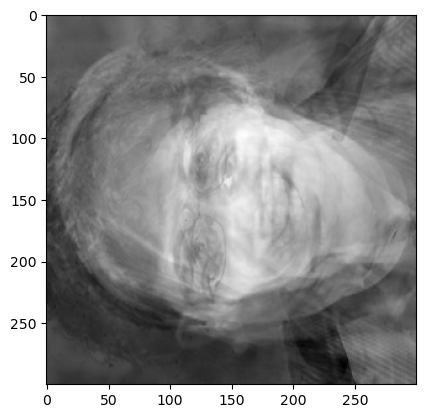

In [ ]:
ReshapedImage = reconstructNewFaces(EigenFaces, avg_face, 'new_image.jpg')

# Show the reconstructed image.
ReshapedImage_s = utils.convertImageToU8bit(ReshapedImage)
ReshapedImage_s = Image.fromarray(ReshapedImage_s)

# ReshapedImage_s.show()
plt.imshow(ReshapedImage_s, cmap='gray')

### **Summary**

In this exercise, We have created EigenFaces from the dataset of images of different faculty for this program. The resulting image is not that clear but is able to capture patters in the images.